# 서포트 벡터 머신
* 초평면( Hyper Plain )에 대한 이해
* 라그랑주 승수
* 미분
* 벡터에 대한 이해
* 라그랑주 승수를 활용한 최적화 개념

## SVM의 종류
* 선형 SVM(`LinearSVC`, `LinearSVM`)
  * 데이터에 직선을 투영하는 방식
* 비선형 SVM(커널 SVM)

공통점 : 초평면을 활용하는 방식

## SV (Support Vector)
* 훈련되어 있는 데이터 포인트에서 Support Vector를 선정하는 것이 SVM의 훈련과정
* 서포트 벡터의 개수와 범위를 지정하면서 복잡도를 조절

In [ ]:
!pip install mglearn

## 선형 SVM
* 직선을 이용해 분류 / 회귀를 하는 방식
* **다항식**을 활용한 학습 방식

In [ ]:
import mglearn
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

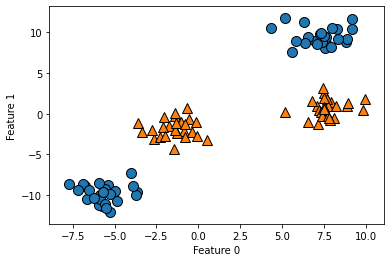

In [ ]:
X, y = make_blobs(centers=4, random_state=8)
y = y % 2 # 레이블 만들기

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


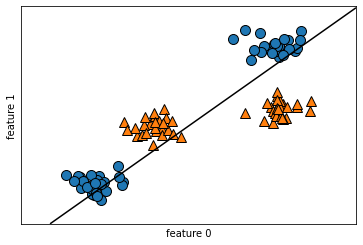

In [ ]:
# 선형 모델 LinearSVC를 이용해서 직선으로 결정경계 만들어 보기
from sklearn.svm import LinearSVC

linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.show()

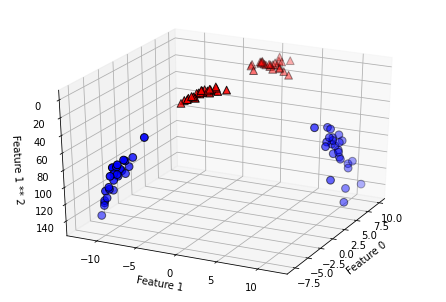

In [ ]:
import numpy as np


X_new = np.hstack([X, X[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()

#3차원 그래프
ax = Axes3D(figure, elev=-152, azim=-26)

# y == 0인 포인트를 그리고 다음 y == 1 인 포인트를 그리기
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")
ax.set_zlabel("Feature 1 ** 2")
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


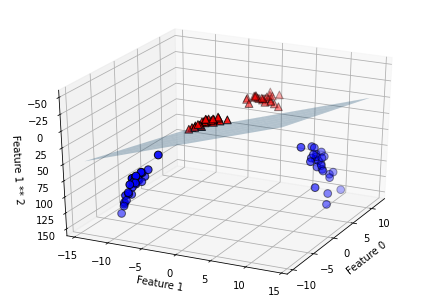

In [ ]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# 선형 결정 경계 그리기
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")
ax.set_zlabel("Feature 1 ** 2")
plt.show()

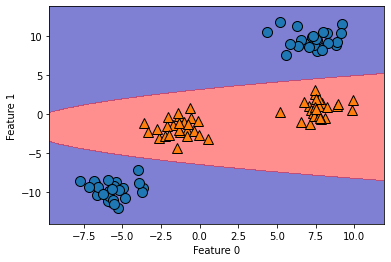

In [ ]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels = [dec.min(), 0, dec.max()], cmap=mglearn.cm2, alpha=0.5)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

위와 같은 방식을 **다차항 추가 기법**이라고 한다.

실무에서는 어떠한 특성을 제곱하거나 세제곱 등을 해서 차원을 늘릴지가 **미지수**... ( 분석을 통해서 알아내야 한다. )

그냥 막 추가하면 의미 없이 말도 안되게 차원이 늘어날 수도 있다.

# 비선형 SVM ( 커널 SVM )
* 선형 SVM의 다차항 추가방식은 수학적인 기교를 활용하는 방식
* 커널 SVM은 수학적인 기교 보다는 **커널 트릭(kernel trick)**을 이용하는 방식
  * 자주 사용되는 커널 - RBF(Radial Basis Function)을 활용 - **가우시안 커널**
  * $k(x_1, x_2) = \exp \left( -\gamma ||x_1-x_2||^2 \right)$
* SVM 모델이 학습하는 것 : **훈련 데이터 포인트가 두 클래스 사이의 결정 경계를 구분하는데 얼마나 중요한지를 배운다.**
* 이 데이터 포인트를 **서포트 벡터**라고 한다.
* 가우시안 커널 폭의 거리는 최대 마진거리로 만들어 진다.

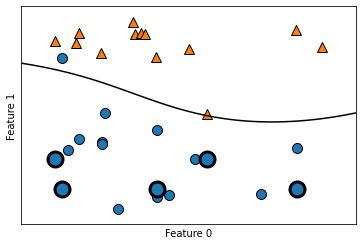

In [ ]:
from sklearn.svm import SVC
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)

mglearn.plots.plot_2d_separator(svm, X, eps=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

# 선정된 서포트 벡터 선정
sv = svm.support_vectors_

# 선정된 서포트 벡터에 표시하는 작업
sv_labels = svm.dual_coef_.ravel() > 0 # dual_coef_의 부호에 의해 서포트 벡터의 클래스 레이블이 결정된다.

mglearn.discrete_scatter(sv[:, 0], sv_labels, s = 15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

## SVM의 하이퍼 파라미터
* gamma
 * 가우시안 커널폭의 역수 ( gamma가 커지면 커널폭이 작아지고, gamma가 작아지면 커널폭이 커진다.)
 * gamma 매개변수가 하나의 훈련 샘플에 미치는 영향의 범위를 설정
 * gamma가 커지면 복잡도가 올라간다.
 * gamma가 커지면 연관성 있는 데이터 포인트 끼리의 모임을 만든다.

* C
 * 서포트 벡터 선정에 영향을 미치는 규제 매개변수
 * 각 데이터 포인트의 중요도 값을 제한합니다.
 * 서포트 벡터는 == 포인트의 중요도
 * 포인트 중요도 : 서포트 벡터로써, 결정 경계를 구성하는데 어떠한 역할을 하는지

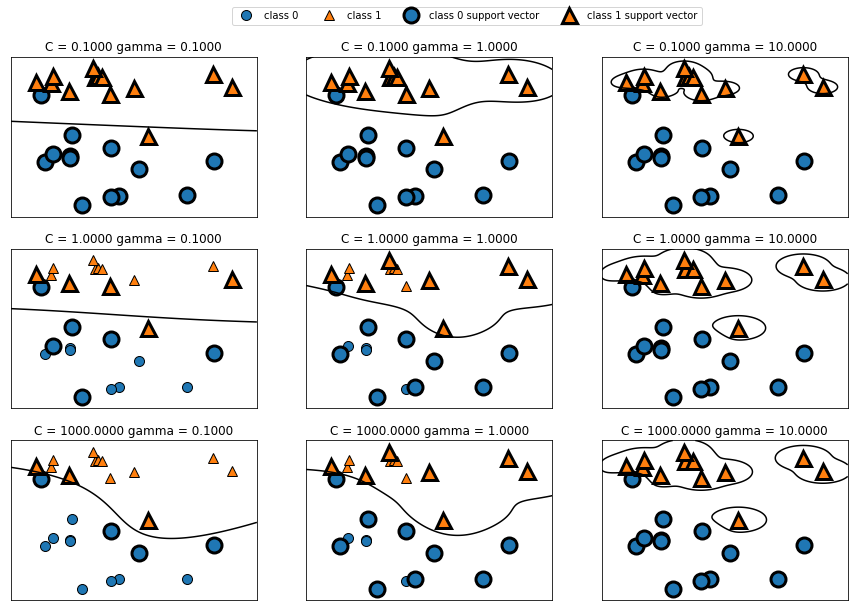

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]) :
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C = C, log_gamma=gamma, ax=a)
        
axes[0, 0].legend(["class 0", "class 1", "class 0 support vector", "class 1 support vector"],
                  ncol=4, loc=(.9, 1.2))
plt.show()

## SVM의 특징

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data,
    cancer.target,
    random_state=0
)

svc = SVC()
svc.fit(X_train, y_train)

print("훈련 세트 정확도: {:.2f}".format(svc.score(X_train, y_train)))
print("테스트 세트 정확도: {:.2f}".format(svc.score(X_test, y_test)))

훈련 세트 정확도: 0.90
테스트 세트 정확도: 0.94


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

std_scaler = StandardScaler()

X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

svc = SVC().fit(X_train_scaled, y_train)

print("스케일링된 훈련 세트 정확도: {:.2f}".format(svc.score(X_train_scaled, y_train)))
print("스케일링된 테스트 세트 정확도: {:.2f}".format(svc.score(X_test_scaled, y_test)))

스케일링된 훈련 세트 정확도: 0.99
스케일링된 테스트 세트 정확도: 0.97


In [ ]:
minmax_scaled = MinMaxScaler()

X_train_scaled = minmax_scaled.fit_transform(X_train)
X_test_scaled = minmax_scaled.transform(X_test)

svc = SVC().fit(X_train_scaled, y_train)

print("스케일링된 훈련 세트 정확도: {:.2f}".format(svc.score(X_train_scaled, y_train)))
print("스케일링된 테스트 세트 정확도: {:.2f}".format(svc.score(X_test_scaled, y_test)))

스케일링된 훈련 세트 정확도: 0.98
스케일링된 테스트 세트 정확도: 0.97


SVM 알고리즘은 데이터의 스케일에 영향을 많이 받는다.